[IPython Notebook](hierarchicial_triple_pd.ipynb) |  [Python Script](hierarchical_triple_pd.py)

Hierarchical Triple (PHOEBE 2 vs Photodynam)
============================

**NOTE**: Photodynam is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [photodynam](https://github.com/dfm/photodynam) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_triple()
b['q@inner'] = 0.7
b['q@outer'] = 0.6

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


In [3]:
b.add_dataset('LC', time=np.linspace(0,10,201), dataset='lc01')

<ParameterSet: 22 parameters | methods: LC, LC_dep>

In [4]:
b.add_dataset('RV', time=np.linspace(0,10,201), dataset='rv01')

<ParameterSet: 31 parameters | methods: RV, RV_dep>

In [5]:
b.add_dataset('ORB', time=np.linspace(0,10,201), dataset='orb01') 

<ParameterSet: 4 parameters | components: _default, starA, starC, starB>

Running Compute
-----------------------

Photodynam includes ltte effects by default, so let's enable them in PHOEBE 2 as well.

In [6]:
b.add_compute(compute='phoebe', ltte=True, rv_method='dynamical')

<ParameterSet: 18 parameters | qualifiers: dynamics_method, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, eclipse_alg, mesh_method>

In [7]:
b.add_compute('photodynam', compute='pd')

<ParameterSet: 3 parameters | qualifiers: orbiterror, stepsize, enabled>

In [8]:
b.run_compute(compute='phoebe', model='phoebemodel')

<ParameterSet: 29 parameters | methods: RV, ORB, LC>

In [9]:
b.set_value_all('pbscale', 'pblum')
# TODO: remove this once photodynam supports coupled pblums

In [10]:
b.run_compute(compute='pd', model='pdmodel')

<ParameterSet: 29 parameters | methods: RV, ORB, LC>

Plotting
-------------------------

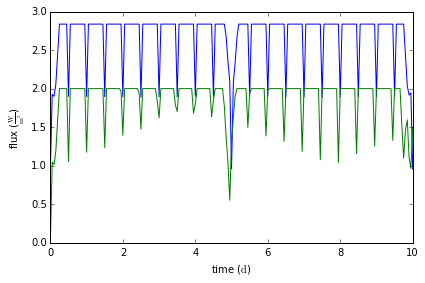

In [11]:
axs, artists = b['lc01@phoebemodel'].plot()
axs, artists = b['lc01@pdmodel'].plot()

Since RV and orbit plots contain lines for multiple stars, we'll compare PHOEBE 2.0 (left) vs Photodynam (right) side-by-side.

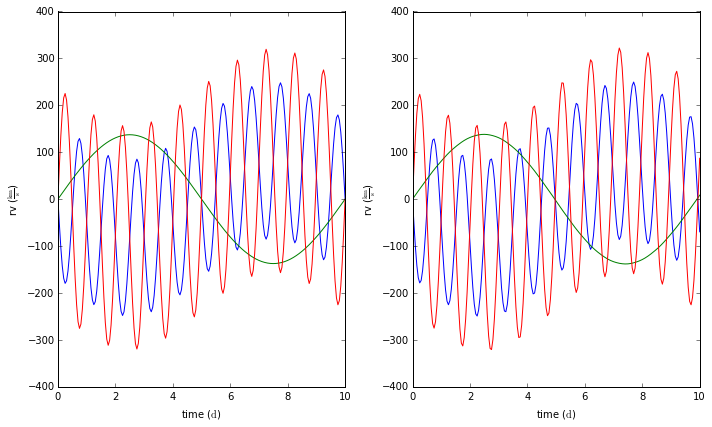

In [12]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['rv01@phoebemodel'].plot(ax=ax1)
axs, artists = b['rv01@pdmodel'].plot(ax=ax2)

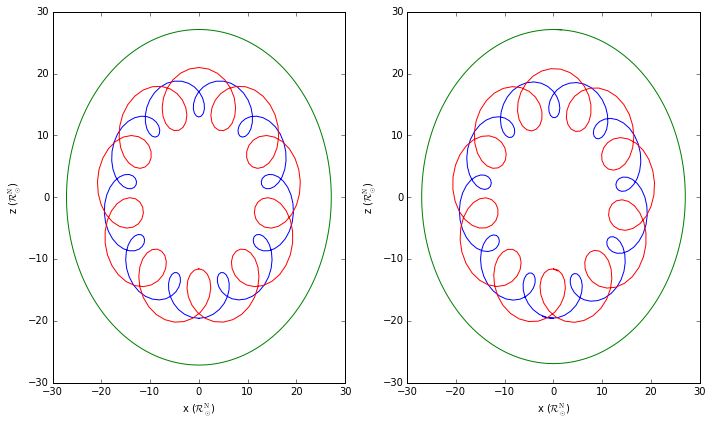

In [13]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['orb01@phoebemodel'].plot(x='x', y='z', ax=ax1)
axs, artists = b['orb01@pdmodel'].plot(x='x', y='z', ax=ax2)

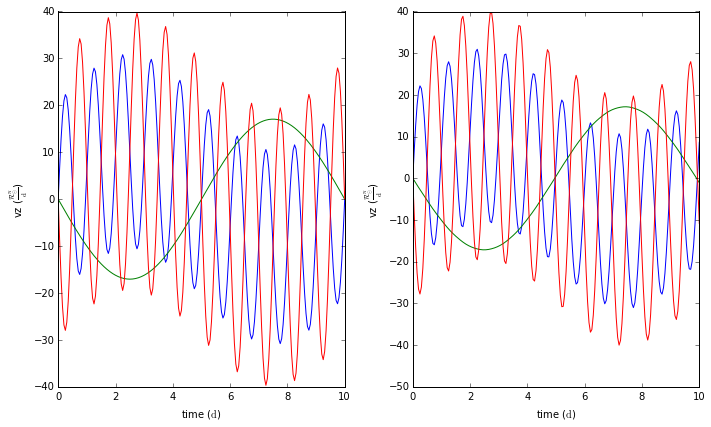

In [14]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['orb01@phoebemodel'].plot(x='time', y='vz', ax=ax1)
axs, artists = b['orb01@pdmodel'].plot(x='time', y='vz', ax=ax2)